In [186]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [187]:
f = pd.read_excel('Analityczna pH.xlsx')
f = [f[f.columns[x]].values.tolist() for x in range(4)]
f = [[float(str(x)) for x in y if str(x) != "nan"] for y in f]
d=[]
v=[]
for i in range(len(f[3])-1):
    d.append(i)
    v.append(i)
    d[i]=(f[3][i]-f[3][i+1])/(f[2][i]-f[2][i+1])
    v[i]=(f[2][i]+f[2][i+1])/2
a=np.array([36.5,38.5])
b=np.array([28.15,30.65])

In [188]:
def drawLine2P(x,y,style,xlims=[0,0], shift=[0,0]):
    if xlims[0]==0:
        xlims[0]=x[0]-3
    if xlims[1]==0:    
        xlims[1]=x[1]+3
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*(xrange+shift[0]) + b + shift[1], linestyle=style, color='C0')
    xlims=[0,0]

In [192]:
(f[1][30] + f[1][32])/2 - f[1][30]

-1.335

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_27804\3361657897.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]


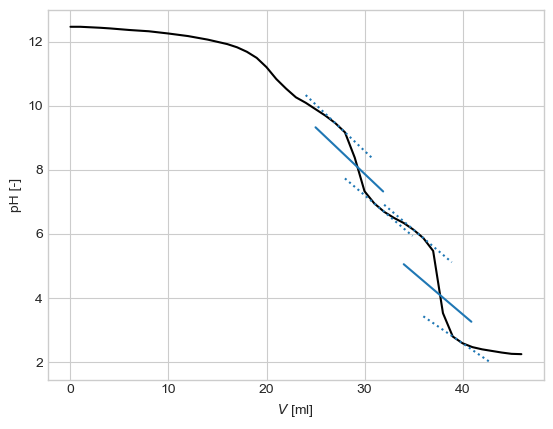

In [196]:
plt.plot(f[0],f[1], color='k')
drawLine2P(f[0][20:22], f[1][20:22], ':')
drawLine2P(f[0][20:22], f[1][20:22], '-', xlims=[25,32], shift=[0,-0.7149999999999999])
drawLine2P(f[0][24:26], f[1][24:26], ':', xlims=[0,0])

drawLine2P(f[0][28:30], f[1][28:30], ':', xlims=[0,0])
drawLine2P(f[0][28:30], f[1][28:30], '-', xlims=[34,41], shift=[0,-1.335])
drawLine2P(f[0][32:34], f[1][32:34], ':', xlims=[0,0])
plt.ylabel('pH [-]')
plt.xlabel('$V$ [ml]')
plt.style.use('seaborn-whitegrid')
plt.show()

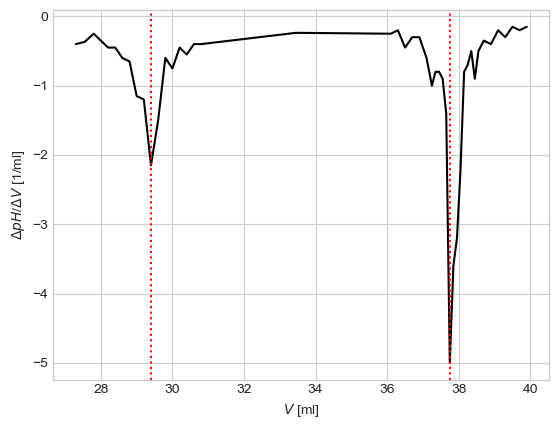

In [197]:
plt.plot(v,d,color='k')
plt.axvline(x=29.4,color='r',linestyle=':')
plt.axvline(x=37.75, color='r',linestyle=':')
plt.ylabel('$\Delta pH$/$\Delta V}$ [1/ml]')
plt.xlabel('$V$ [ml]')
plt.style.use('seaborn-whitegrid')
plt.show()